<a href="https://colab.research.google.com/github/jhj1819/Machine-learning/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 폰트

In [99]:
import sys
if 'google.colab' in sys.modules:
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
     fm.fontManager.addfont(fpath)

import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

#과제 1 (정한준)

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## [A] Numpy

### 1) 모양이 (20,)인 4개의 1차원 배열 a,b,c,d 만들고 출력

- a : 1~20 정수 배열
- b : 0부터 1(포함)까지를 등간격으로 나눈 배열
- c : 정수 집합 {1, 2}에서 랜덤하게 뽑은 난수 배열(단, seed는 1로 설정)
- d : 표준정규분포에서 추출한 난수 배열(단, seed는 2로 설정)

In [101]:
a = np.arange(1,21)
print("a: ", a)

a:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [102]:
b = np.round(np.linspace(0,1,20),2)
print("b: ", b)

b:  [0.   0.05 0.11 0.16 0.21 0.26 0.32 0.37 0.42 0.47 0.53 0.58 0.63 0.68
 0.74 0.79 0.84 0.89 0.95 1.  ]


In [103]:
np.random.seed(1)
c = np.random.randint(1,3,(20,))
print("c: ", c)

c:  [2 2 1 1 2 2 2 2 2 1 1 2 1 2 2 1 1 2 1 1]


In [104]:
np.random.seed(2)
d = np.round(np.random.randn(20),2)
print("d: ", d)

d:  [-0.42 -0.06 -2.14  1.64 -1.79 -0.84  0.5  -1.25 -1.06 -0.91  0.55  2.29
  0.04 -1.12  0.54 -0.6  -0.02  1.18 -0.75  0.01]


### 2) 배열 d에서 음수의 합을 구하시오.

In [105]:
print(sum(d[d < 0]))

-10.959999999999999


### 3) 배열 d에서 최댓값의 인덱스를 구하시오.

In [106]:
print(np.argmax(d))

11


### 4) 1 에서 만든 4개의 1차원 배열을 칼럼으로 이어 붙여 모양이 (20, 4)인 2차원 배열 m을 만들고 처음 5개 행을 출력하시오.

In [107]:
m = np.column_stack((a,b,c,d)) # d 추가하면 범위 넘어감
np.set_printoptions(suppress=True, precision=2)  # 소수점 표기법으로 출력

In [108]:
m[:5]

array([[ 1.  ,  0.  ,  2.  , -0.42],
       [ 2.  ,  0.05,  2.  , -0.06],
       [ 3.  ,  0.11,  1.  , -2.14],
       [ 4.  ,  0.16,  1.  ,  1.64],
       [ 5.  ,  0.21,  2.  , -1.79]])

### 5) 배열 m에 대하여 칼럼별 평균을 구하시오

In [109]:
m.mean(axis = 0)

array([10.5 ,  0.5 ,  1.55, -0.21])

### 6) 배열 m의 2번 칼럼(c에 해당)의 값이 1인 행만 출력하시오.

In [110]:
m[m[:,2]==1]

array([[ 3.  ,  0.11,  1.  , -2.14],
       [ 4.  ,  0.16,  1.  ,  1.64],
       [10.  ,  0.47,  1.  , -0.91],
       [11.  ,  0.53,  1.  ,  0.55],
       [13.  ,  0.63,  1.  ,  0.04],
       [16.  ,  0.79,  1.  , -0.6 ],
       [17.  ,  0.84,  1.  , -0.02],
       [19.  ,  0.95,  1.  , -0.75],
       [20.  ,  1.  ,  1.  ,  0.01]])

## [B] Pandas

### 1-1) 파일을 읽어 PassengerId를 인덱스로 하는 데이터프레이을 만든 후, Name 칼럼을 삭제한 데이터프레임의 처음 5개 행을 출력하시오.

In [111]:
df = pd.read_csv('/content/sample_data/titanic.csv',
                 index_col = 'PassengerId')

df1 = df.drop(['Name'], axis = 1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


### 1-2) 데이터프레임의 행과 열의 개수는 얼마인가?

In [112]:
df_shape = df.shape
print("행 :", df_shape[0])
print("열 :", df_shape[1])

행 : 891
열 : 11


### 1-3) 결측치가 있는 칼럼은 무엇인가?

In [113]:
df1 = df.isna().any()
df1

,0
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False
Cabin,True


In [114]:
df2 = df1[df1 == True]
df2

,0
Age,True
Cabin,True
Embarked,True


In [115]:
print(df2.index)

Index(['Age', 'Cabin', 'Embarked'], dtype='object')


### 2) 나이가 기록된 승객의 수, 승객 나이의 평균과 표준편차, 최솟값, 최댓값을 구하시오.

In [116]:
age_data = df['Age']
not_null_age_data = age_data.dropna()
print("나이가 기록된 승객의 수: ", not_null_age_data.count())
print("나이의 평균: ", not_null_age_data.mean())
print("나이의 표준편차: ", not_null_age_data.std())
print("나이의 최솟값: ", not_null_age_data.min())
print("나이의 최댓값: ", not_null_age_data.max())

나이가 기록된 승객의 수:  714
나이의 평균:  29.69911764705882
나이의 표준편차:  14.526497332334042
나이의 최솟값:  0.42
나이의 최댓값:  80.0


### 3) 승객 나이를 10대, 20대, 30대, ....로 나눈 히스토그램을 작성하시오.

Text(0, 0.5, '탑승객 수')

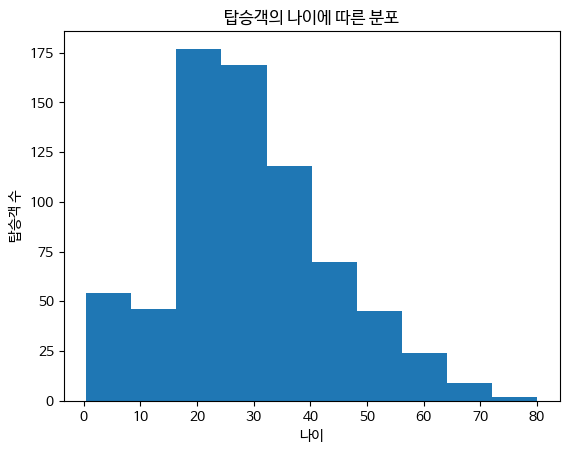

In [117]:
plt.hist(not_null_age_data)  ## import때 .pyplot 붙여줘야함
plt.title('탑승객의 나이에 따른 분포')
plt.xlabel('나이')
plt.ylabel('탑승객 수')

### 4) 생존 승객의 수와 사망 승객의 수를 구하시고, 파이 차트(비율 표시)를 그리시오.

[링크 텍스트](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html) 참고

In [118]:
survived_data = df["Survived"]
survived_count = survived_data[survived_data == 1].count()
dead_count = survived_data[survived_data == 0].count()
print("생존 승객 수", survived_count)
print("사망 승객 수", dead_count)

생존 승객 수 342
사망 승객 수 549


Text(0.5, 1.0, '생존자와 사망자 비율')

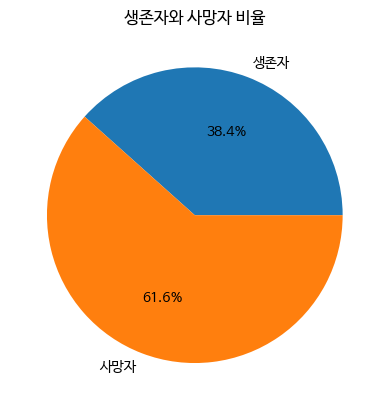

In [119]:
labels = '생존자', '사망자'
sizes = [survived_count, dead_count]

ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.set_title("생존자와 사망자 비율")

### 5) 남녀별 생존율을 구하고, 막대 그래프를 그리시오

In [120]:
male_count = len(df[df.Sex == 'male'])
survived_male_count = len(df[df.Sex == 'male'][df.Survived == 1])
male_survival_rate = survived_male_count/male_count
print("남자 생존률: ", male_survival_rate)

남자 생존률:  0.18890814558058924


<ipython-input-120-4bf259e05274>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survived_male_count = len(df[df.Sex == 'male'][df.Survived == 1])


In [121]:
female_count = len(df[df.Sex == 'female'])
survived_female_count = len(df[df.Sex == 'female'][df.Survived == 1])
female_survival_rate = survived_female_count/female_count
print("여자 생존률: ", female_survival_rate)

여자 생존률:  0.7420382165605095


<ipython-input-121-328c41292519>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  survived_female_count = len(df[df.Sex == 'female'][df.Survived == 1])


[링크 텍스트](https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html) 참고

Text(0.5, 0, '성별')

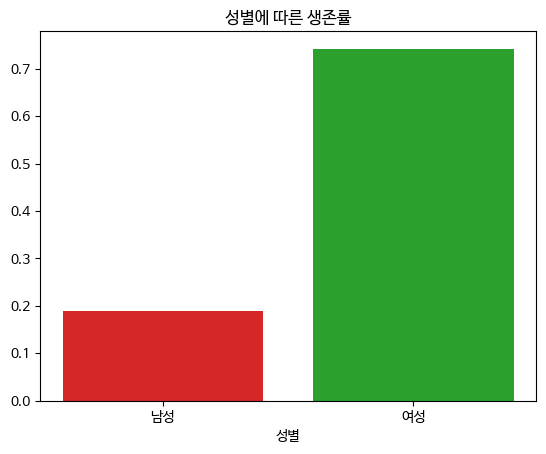

In [122]:
ax = plt.axes()
labels = ['남성', '여성']
bar_colors = ['tab:red', 'tab:green']
sizes = [male_survival_rate, female_survival_rate]
ax.bar(labels, sizes , color = bar_colors)
ax.set_title("성별에 따른 생존률")
ax.set_xlabel("성별")